## Preparation
---

In [69]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 

import yfinance as yf
import datetime


[*********************100%%**********************]  1 of 1 completed


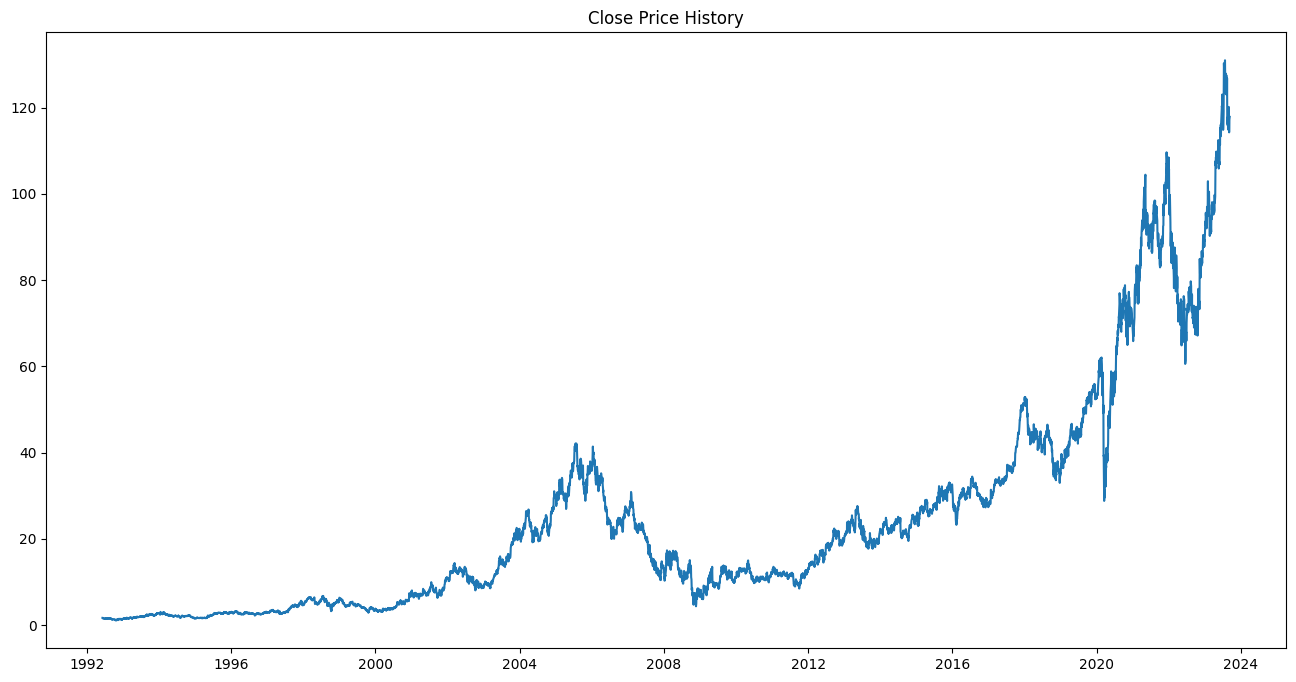

In [70]:
stock = "DHI"
df = yf.download(stock)
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

In [71]:
# Get the stock quote

start_date = datetime.datetime(2009, 1, 1)
end_date = datetime.datetime(2019, 12, 17)

df = yf.download(stock, start=start_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,7.100000,7.440000,6.850000,7.340000,6.213734,4164400
2009-01-05,7.400000,8.090000,7.150000,8.000000,6.772463,7633500
2009-01-06,8.280000,8.390000,7.860000,8.000000,6.772463,8488700
2009-01-07,7.840000,7.960000,7.440000,7.570000,6.408442,5802300
2009-01-08,7.280000,8.200000,7.280000,8.150000,6.899445,6393900
...,...,...,...,...,...,...
2023-09-05,119.760002,119.870003,113.889999,114.279999,114.279999,3266200
2023-09-06,114.989998,116.129997,114.440002,115.629997,115.629997,2783500
2023-09-07,115.510002,117.760002,114.480003,117.110001,117.110001,2604200



---

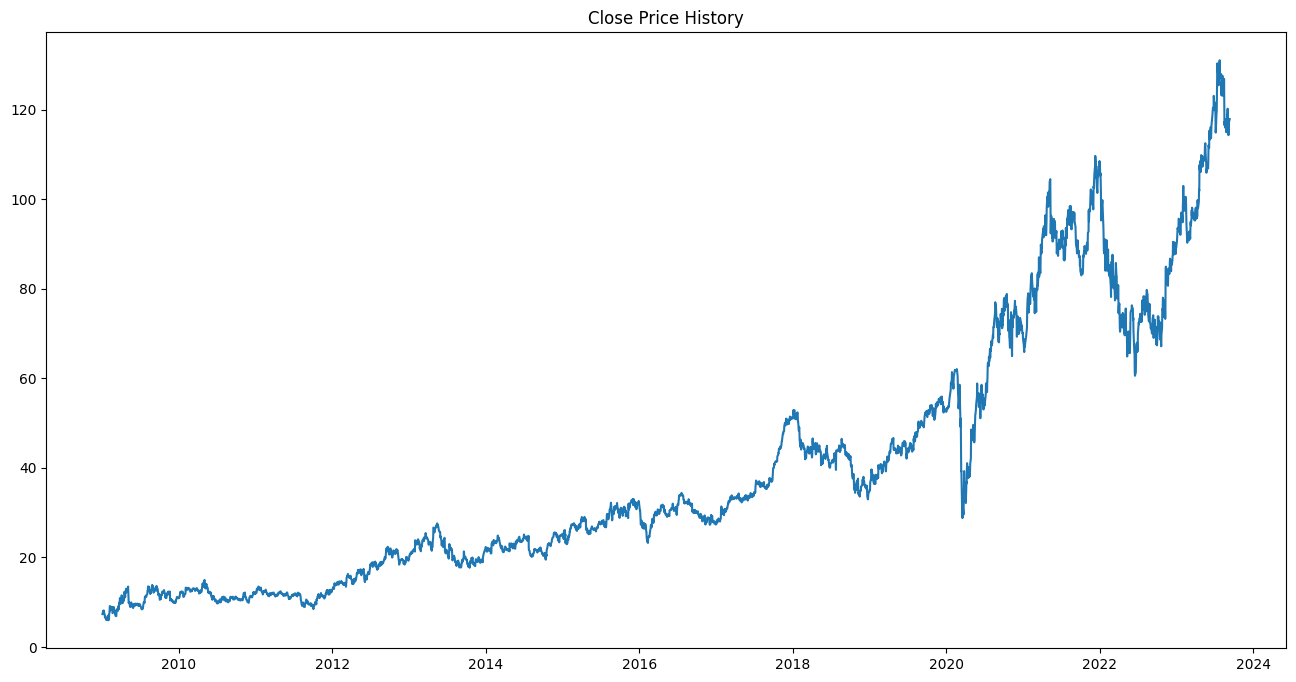

In [72]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

## Data Processing
---

In [73]:
## Interval內 8成為records

data = df[['Close']]

dataset = data.values  # Take out the index col
training_data_len = math.ceil(len(dataset)*0.8)   ## Can be repalced by sklearn 
training_data_len

2958

In [74]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1)) # 用泥scale 野既模組

scaled_data = scaler.fit_transform(dataset)



In [75]:
interval = 40

In [76]:
# Spilt the data

train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []
delay = 8

for i in range(interval+delay, len(train_data)):
    x_train.append(train_data[i-interval-delay:i-delay,0])
    y_train.append(train_data[i,0])   


    if i == 60:
        print(x_train)
        


[array([0.01103647, 0.01631478, 0.01631478, 0.01287588, 0.01751439,
       0.01535509, 0.01015675, 0.00991682, 0.00487844, 0.00511836,
       0.0065579 , 0.00087972, 0.00287908, 0.00079974, 0.00335893,
       0.00415867, 0.00351887, 0.00839731, 0.00159949, 0.        ,
       0.00119962, 0.01167626, 0.01247601, 0.0168746 , 0.02543186,
       0.02455214, 0.01767434, 0.02023352, 0.02007358, 0.02399232,
       0.02367243, 0.01983365, 0.01263596, 0.01327575, 0.01639476,
       0.02351247, 0.02359245, 0.02007358, 0.01991363, 0.01671465]), array([0.01631478, 0.01631478, 0.01287588, 0.01751439, 0.01535509,
       0.01015675, 0.00991682, 0.00487844, 0.00511836, 0.0065579 ,
       0.00087972, 0.00287908, 0.00079974, 0.00335893, 0.00415867,
       0.00351887, 0.00839731, 0.00159949, 0.        , 0.00119962,
       0.01167626, 0.01247601, 0.0168746 , 0.02543186, 0.02455214,
       0.01767434, 0.02023352, 0.02007358, 0.02399232, 0.02367243,
       0.01983365, 0.01263596, 0.01327575, 0.01639476, 0.02

In [77]:
## Convert the x_train and y_train 
x_train, y_train = np.array(x_train), np.array(y_train)



In [78]:
## Reshape the data for LSTM model

i,j = x_train.shape
x_train_reshaped = np.reshape(x_train,(i,j,1))
print(x_train_reshaped.shape)


(2910, 40, 1)


## Modeling
---

In [79]:
# Build the LSTM Model

model = Sequential()

num_cells = 40
# model.add(LSTM(50, return_sequences=True, input_shape= (j,1)))
model.add(LSTM(num_cells , return_sequences=False, input_shape=(j,1)))

model.add(Dense(25))
model.add(Dense(1))

In [80]:
## Comple the model
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [81]:
num_epochs = 3
model.fit(x_train, y_train, batch_size = 1, epochs=num_epochs)

Epoch 1/3
2910/2910 [==============================] - 24s 8ms/step - loss: 6.4589e-04
Epoch 2/3
2910/2910 [==============================] - 24s 8ms/step - loss: 4.6225e-04
Epoch 3/3
2910/2910 [==============================] - 21s 7ms/step - loss: 4.5596e-04


In [82]:
test_data = scaled_data[training_data_len-interval:]

x_test = []
y_test = dataset[training_data_len:,]

for i in range (interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])


In [83]:
x_test = np.array(x_test)

In [84]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [85]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 1s 4ms/step


## RMSE
---

In [86]:
rmse = np.sqrt(np.mean((y_test - predictions)**2))
rmse

2.1076715890520434

## Plot the Data
---

/var/folders/0c/4yyxy27966j8h86h_vwsy3680000gn/T/ipykernel_79017/643579412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


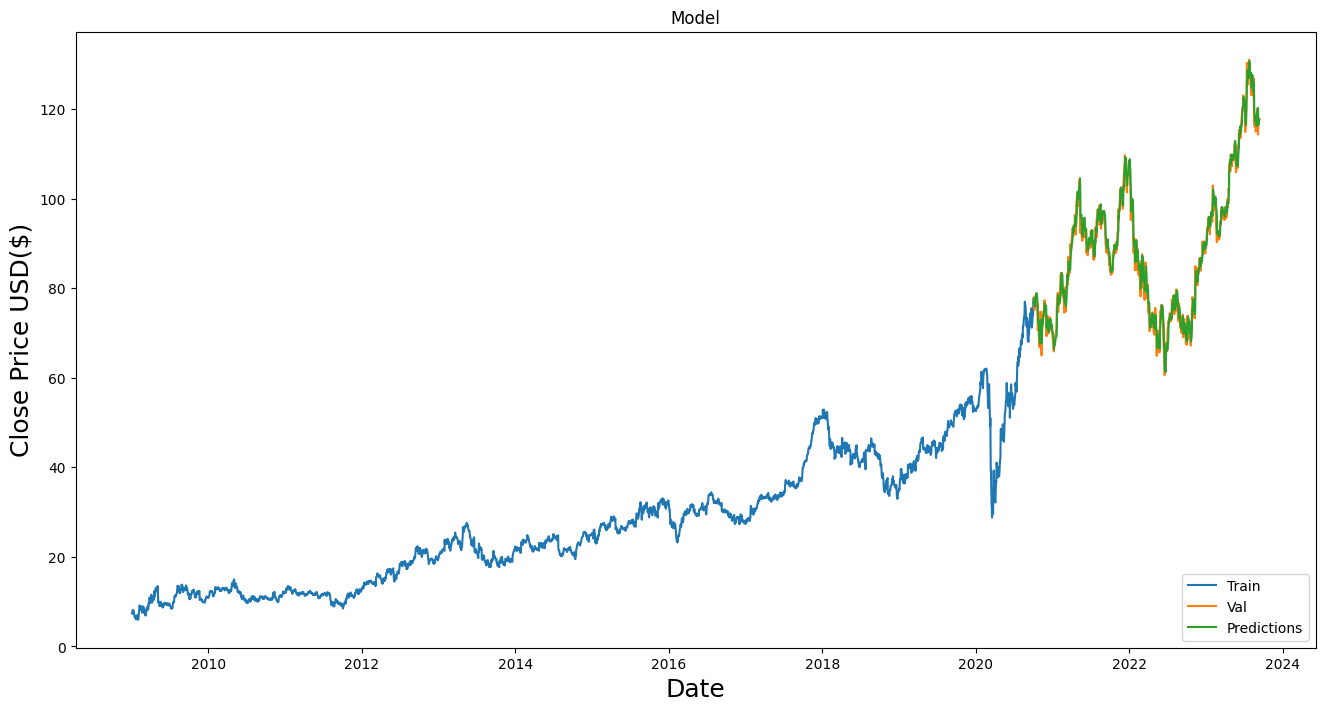

In [87]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()




## Result in Data

---

In [88]:

valid

,Close,Predictions
Date,,
2020-10-02,77.889999,76.758263
2020-10-05,75.699997,77.647820
2020-10-06,75.110001,76.689041
2020-10-07,75.760002,75.911995
2020-10-08,77.709999,75.964760
...,...,...
2023-09-05,114.279999,120.192322
2023-09-06,115.629997,116.916344
2023-09-07,117.110001,116.453781


In [89]:
valid.to_csv('{0}days_{1}Cells_{2}Epoches_{3}daysdelay.csv'.format(interval,num_cells, num_epochs, delay), index=True)


In [90]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets
